## Workshop Week 5

The goal of the workshop this week is to work through a standard Data Science workflow: exploring data, building models, making predictions, evaluating results.    We will do this in the first instance using a simple linear least squares model and will look at two datasets.  The first is the standard Iris dataset describing flowers, the second is the AutoMPG dataset. 



In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

The datasets we will use are available in a number of forms.  We'll use the versions bundled with the __seaborn__ plotting library since they load as Pandas dataframes.  


In [29]:
iris = sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


## Explore the dataset

Examine the data, what are the columns? How is the spread of variables - eg. is it normally distributed?  You might want to use the [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function which shows all variables plotted against each other as a matrix.  You should also look at the means and variances of each variable.  Get to know the Pandas methods (e.g. the `describe` method) for doing this.

Your goal is to get a good feel for the data you are dealing with. Eventually you will be trying to work out what techniques you might be able to use to work with the data. For now, just get used to exploring it.

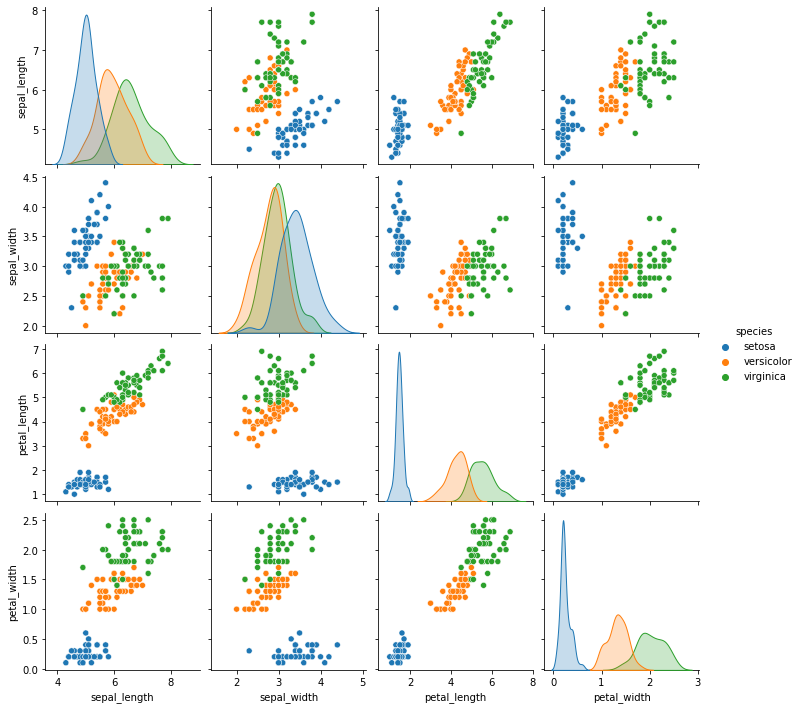

In [30]:
sns.pairplot(iris, hue='species')

There is quite a normal distrubution between the sepal and petal width and length of the three species of flowers. Species Setosa has smaller sepal lengths but larger sepal widths. Versicolor Species lies in the middle of the other two species in terms of sepal length and width. Species Virginica has larger sepal lengths but smaller sepal widths. We can actually see many types of relationships from this plot such as the species Seotsa has the smallest of petals widths and lengths. It also has the smallest sepal length but larger sepal widths. Such information can be gathered about any other species.

In [31]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can see the count of each column along with their mean value, standard deviation, minimum and maximum values.

In [32]:
print("The variances of each variable are:", iris.var(numeric_only=True) )
print("The Means of each variable are:",iris.mean(numeric_only=True))

The variances of each variable are: sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64
The Means of each variable are: sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64


## Linear Regression

A quick search will reveal many different ways to do linear regression in Python. We will use the [sklearn LinearRegression](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) function.  The sklearn module has many standard machine learning methods so it is a good one to get used to working with.  

Linear Regression involves fitting a model of the form:

> $y = O_1X + O_2$

Where $y$ is the (numerical) variable we're trying to predict, $X$ is the vector of input variables, $O_1$ is the array of model coefficients and $O_2$ is the intercept.  In the simple case when X is one-dimensional (one input variable) then this is the forumula for a straight line with gradient $O_1$.

We will first try to predict `petal_width` from `petal_length` in the iris data.  You should look at the plot of these two variables to see that they are roughly correlated.  Here is the code using `slkearn` to do this.   We first create a linear model, then select the data we will use to train it - note that `X` (the input) is a one-column pandas dataframe while `y` (the output) is a Series.  The `fit` method is used to train the model.  The result is a set of coefficients (in this case just one) and an intercept.  


In [33]:
reg = linear_model.LinearRegression()
X = iris[['petal_length']]
y = iris['petal_width']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [0.41575542] + -0.3630755213190291


For every 1 of the petal length  there will be 0.41575542 in petal width

We can now use the `predict` method to predict the value of `petal_width` from some values of `petal_length`:

In [34]:
reg.predict(X[:3])

array([0.21898206, 0.21898206, 0.17740652])

Predicting the first 3 values 

Prediction in this case is just using the formual $y = x * O_1 + O_2$ - confirm this is the case by evaluating some sample values from `petal_length` (use `reg.coef_` and `reg.intercept_`).

In [35]:
xmin = X.min()
ymin = reg.coef_[0] * xmin + reg.intercept_
xmax = X.max()
ymax = reg.coef_[0] * xmax + reg.intercept_ 

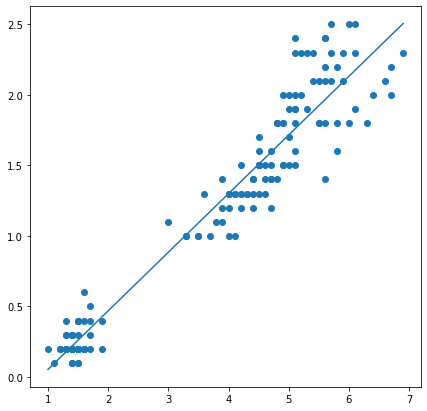

In [36]:
plt.figure(figsize=(7,7))
plt.plot([xmin, xmax], [ymin, ymax])  
plt.scatter(X, y) 

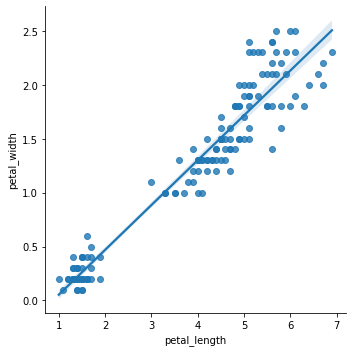

In [37]:
p = sns.lmplot(x="petal_length", y="petal_width", data=iris, height=5)

In [38]:
print("Predicted value for x =", xmin[0], "is", reg.predict([xmin]))
yhat = reg.predict(X)
yhat

Predicted value for x = 1.0 is [0.0526799]


array([0.21898206, 0.21898206, 0.17740652, 0.2605576 , 0.21898206,
       0.34370869, 0.21898206, 0.2605576 , 0.21898206, 0.2605576 ,
       0.2605576 , 0.30213314, 0.21898206, 0.09425544, 0.13583098,
       0.2605576 , 0.17740652, 0.21898206, 0.34370869, 0.2605576 ,
       0.34370869, 0.2605576 , 0.0526799 , 0.34370869, 0.42685977,
       0.30213314, 0.30213314, 0.2605576 , 0.21898206, 0.30213314,
       0.30213314, 0.2605576 , 0.2605576 , 0.21898206, 0.2605576 ,
       0.13583098, 0.17740652, 0.21898206, 0.17740652, 0.2605576 ,
       0.17740652, 0.17740652, 0.17740652, 0.30213314, 0.42685977,
       0.21898206, 0.30213314, 0.21898206, 0.2605576 , 0.21898206,
       1.59097494, 1.50782385, 1.67412602, 1.29994614, 1.54939939,
       1.50782385, 1.59097494, 1.00891735, 1.54939939, 1.2583706 ,
       1.09206844, 1.38309723, 1.29994614, 1.59097494, 1.13364398,
       1.46624831, 1.50782385, 1.34152169, 1.50782385, 1.2583706 ,
       1.63255048, 1.29994614, 1.67412602, 1.59097494, 1.42467

## Evaluating the model

How well does this model fit the data? We can measure the _mean squared error_ which is based on the difference between the real and predicted values of `petal_width` (mean of the squared differences).  Another measure is $R^2$ which measures the amount of variance in the data that is explained by the model.  Smaller MSE is better.  $R^2$ close to 1 is better.

Note that here I need to convert the output Series (`y`) to an `np.array`, this is because the sklearn library really works with numpy datastructures rather than pandas Series and Dataframes. I could have used [sklearn.metrics.mean_squared_error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) here but I wanted to show you that this is just a simple calculation on the results.

In [39]:
mse = ((y - reg.predict(X))**2).mean()
print(mse, np.sqrt(mse))

0.04206730919499317 0.20510316719883478


In [40]:
predicted = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)
print("MSE:", mse)
print("Root MSE:", np.sqrt(mse))
print("R Squared:", r2)

MSE: 0.04206730919499318
Root MSE: 0.20510316719883478
R Squared: 0.9271098389904927


From this we can see that we have a very good model with a high value of $R^2$ of 0.92. The MSE of .4 means the squared distance from the correct value is 0.4mm. The error in predicting the petal width from the petal lenght is within about 0.2 on the average. Thats about 10% error.

## More Input Variables

Linear regression can work with more input variables, in this case the formula $y = x * O_1 + O_2$ becomes a matrix expression with $x$ and $O_1$ being vectors rather than scalars.  The code is almost exactly the same but we select two columns for the input array $X$.  Here we add `sepal_length`.  Note that the coefficients in the model is now a vector of two values:

In [41]:
reg = linear_model.LinearRegression()
X = iris[['petal_length', 'sepal_length']]
y = iris['petal_width']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [ 0.44937611 -0.08221782] + -0.00899597269816943


The sepal_length has a relatively small effect on how wide the petal is

You can test the model in the same way as before.  Did the model get better? 

In [42]:
predicted = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 0.040962085264089815
R Squared: 0.9290248640257687


Adding a new feature (Sepal_Length) makes our model better. The value for the $R^2$ is a little bit higher than that of the previous model. We can see the variance explained by the model. The highert the value of $R^2$, the better the fit. 

## Training and Testing Data

What we have done so far is to train and test the model on the same data. This is not good practice as we have no idea how good the model would be on new data.   Better practice is to split the data into two sets - training and testing data.  We build a model on the training data and test it on the test data.  

Sklearn provides a function [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to do this common task.  It returns two arrays of data. Here we ask for 20% of the data in the test set. 

In [79]:
train, test = train_test_split(iris, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(120, 5)
(30, 5)


In [80]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
129,7.2,3.0,5.8,1.6,virginica
58,6.6,2.9,4.6,1.3,versicolor
112,6.8,3.0,5.5,2.1,virginica
68,6.2,2.2,4.5,1.5,versicolor
70,5.9,3.2,4.8,1.8,versicolor


In [81]:
reg = linear_model.LinearRegression()
X_train = train[['petal_length', 'sepal_length']]
y_train = train['petal_width']

X_test = test[['petal_length', 'sepal_length']]
y_test = test['petal_width']

reg.fit(X_train, y_train)

LinearRegression()

You can now repeat the above procedure but this time train the model on the training data and evaluate on the test data.  Do the MSE and $R^2$ values change? 

**This is your first checkpoint for this week**

**You have to report MSE and $R^2$ values on the training and test set. Also, provide your interpretation of results. Based on the values on training and testing data, comment whether model is overfitting?**

In [82]:
predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
print("MSE:", mse)
print("Root MSE:", np.sqrt(mse))
print("R Squared:", r2)

MSE: 0.03276435877878612
Root MSE: 0.18100927815663517
R Squared: 0.9278688806513845


When we train and test on different data the results are slighlty poorer than testing on the full training set but the performance of the model is still good at $R^2$ of 0.93.  The MSE value corresponds to a prediction error of 0.18mm on petal width.

# Auto MPG Dataset

This dataset contains details of different US cars with measures of various physical features and the miles-per-gallon (mpg) measure of fuel consumption.   The goal is to predict MPG from other features. 

- explore this dataset, look at summary statistics, plot the data get an idea of how the variables vary together
- split the data into training and testing sets
- use a least squares linear model to predict MPG from the **weight** of the car, evaluate the result
- add other features to the model, evaluate the results. What is the most accurate model? 
- Evaluate model performance in terms of MSE and $R^2$ scores. Comment on whether adding more features improves model's performance.

Add cells as per your need and answer all the above questions.

In [83]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [84]:
print(mpg.isnull().any())

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool


In [85]:
print(mpg.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object


In [51]:
correlation = mpg.corr(method='pearson')
columns = correlation.nlargest(10, 'mpg').index
columns

Index(['mpg', 'model_year', 'acceleration', 'cylinders', 'horsepower',
       'displacement', 'weight'],
      dtype='object')

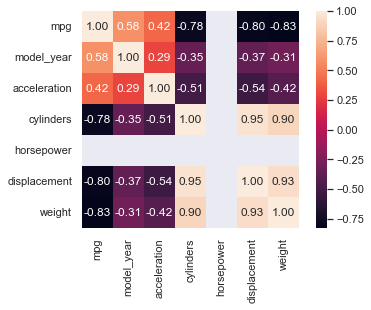

In [52]:
correlation_map = np.corrcoef(mpg[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [53]:
mpg2= mpg[['mpg','cylinders','displacement','horsepower','weight','acceleration']].head()
print(mpg2.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration
0  18.0          8         307.0       130.0    3504          12.0
1  15.0          8         350.0       165.0    3693          11.5
2  18.0          8         318.0       150.0    3436          11.0
3  16.0          8         304.0       150.0    3433          12.0
4  17.0          8         302.0       140.0    3449          10.5


In [54]:
mpg2.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,5.00000,5.0,5.000000,5.000000,5.000000,5.00000
mean,16.80000,8.0,316.200000,147.000000,3503.000000,11.40000
std,1.30384,0.0,19.879638,13.038405,110.006818,0.65192
min,15.00000,8.0,302.000000,130.000000,3433.000000,10.50000
25%,16.00000,8.0,304.000000,140.000000,3436.000000,11.00000
50%,17.00000,8.0,307.000000,150.000000,3449.000000,11.50000
75%,18.00000,8.0,318.000000,150.000000,3504.000000,12.00000
max,18.00000,8.0,350.000000,165.000000,3693.000000,12.00000


In [55]:
print("The variances of each variable are:", mpg2.var(numeric_only=True) ) 

The variances of each variable are: mpg                 1.700
cylinders           0.000
displacement      395.200
horsepower        170.000
weight          12101.500
acceleration        0.425
dtype: float64


In [56]:
print("The mean of each variable are:", mpg2.mean(numeric_only=True) ) 

The mean of each variable are: mpg               16.8
cylinders          8.0
displacement     316.2
horsepower       147.0
weight          3503.0
acceleration      11.4
dtype: float64


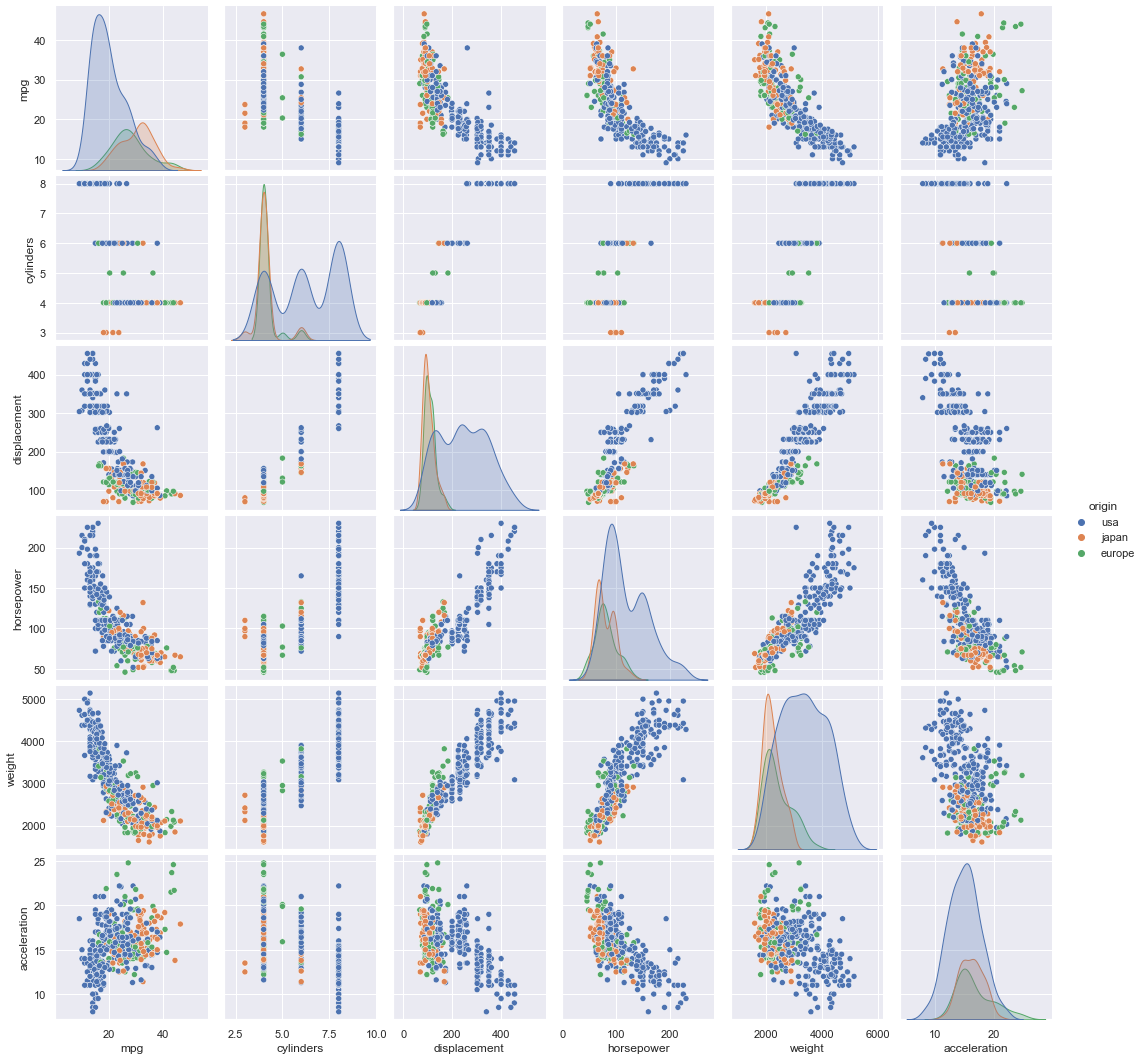

In [57]:
sns.pairplot(data=mpg, x_vars=['mpg','cylinders','displacement','horsepower','weight','acceleration'],  y_vars=['mpg','cylinders','displacement','horsepower','weight','acceleration'] , hue='origin')

In the data set, some relationships between some variables can be seen. The weight and displacement are related with the mpg of the cars. The higher the weight, the lesser the mpg for each car. Some other various relationships can be seen. 

In [58]:
mpg[['weight', 'mpg']].corr()

,weight,mpg
weight,1.000000,-0.831741
mpg,-0.831741,1.000000


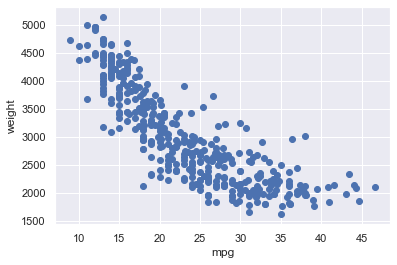

In [59]:
plt.scatter(data=mpg, x='mpg', y='weight')
plt.xlabel("mpg")
plt.ylabel("weight")
plt.show()

In [60]:
feature_cols = ['weight']
X = mpg[feature_cols]
y = mpg['mpg'] 

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y) 

LinearRegression()

In [61]:
print("y = ", model.coef_, "* x + ", model.intercept_) 

y =  [-0.00767661] * x +  46.31736442026565


An additional pound of weight is predicted to reduce the distance traveled 
per gallon by 76 thousands of a mile

In [62]:
predicted = model.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 18.780939734628397
R Squared: 0.6917929800341573


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(318, 1) (80, 1)


In [64]:
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

MSE: 24.566990889759918
R^2: 0.6345502876833409


Using the training and testing data, we have made our model better 

Predicting the value of the mpg from the values of weight and displacement 

In [65]:
feature_cols = ['weight','displacement']
X = mpg[feature_cols]
y = mpg['mpg'] 

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y) 

LinearRegression()

In [66]:
print("y = ", model.coef_, "* x + ", model.intercept_) 

y =  [-0.00579774 -0.01635835] * x +  43.90046375787347


In [67]:
predicted = model.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 18.404140933712643
R Squared: 0.6979764850769228


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(318, 2) (80, 2)


In [69]:
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

MSE: 11.024028320985991
R^2: 0.7940868615187084


**This is your final checkpoint for this week**

**You have to report MSE and $R^2$ values on the training and test set. Also, provide your interpretation of results. Based on the values on training and testing data, comment whether model is overfitting?**

Adding a new feature displacement to our model makes our model much better with a higher value for $R^2$. The weight and the displacement has a high correlation witht the mpg of eavh car. Other features could be examined, like the the horsepower of each car in relation to the mpg.

## Commit your finished work on Github
Here are the list of steps you need to follow to commit your work on Github to get checkpoint mark for this week.

Once you finished all the above questions, save the notebook by clicking 'save' button in the toolbar.

You need to follow the same instructions to commit your work on your Github repository.

Step 1. Change your current directory to `practical-workshops-yourName` by doing `cd` command. You can type:
                    `cd practical-workshops-yourName`
                    
Step 2: Add your Workshop Week 5.ipynb using:
                 `git add "Workshop Week 5.ipynb`
                 
Step 3: Commit your work:
                `git commit -m "Finished Workshop 5`
                
Step 4: Push your changes:
                `git push origin master`
                
Step 5: Confirm whether your finished work is now on Github repository by signing into your Github account and clicking on your repository. You can see your added `Workshop Week 5.ipynb` file as well as your `commit message` and `time` of your commit.

Step 6: Well done!. You have now finished your Practical Workshop Week 5. Appreciate yourself.